In [1]:
import pandas as pd
import numpy as np
import jupyterlab_dash
import dash
import dash_html_components as html
import dash_core_components as dcc

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import re

In [3]:
real_data = pd.read_csv('Results/Real_Data.csv')
RGD = pd.read_csv('Results/RGD.csv')
RGU = pd.read_csv('Results/RGU.csv')
SF = pd.read_csv('Results/SF.csv')

In [4]:
phis = ['5', '10', '18', '20', '25', '50']
ylabs_map = {'S': 'Number of Nodes Influenced',
            'N': 'Proportion of Network Influenced',
            'P': 'Proportion of Network Influenced',
            'T': 'Average Time of Influenced'}

In [5]:
def get_graph(df, cols, y_lab):
    x = df.iloc[:,0]
    fig = go.Figure()

    for col in cols:
        lab = col.split('_')[1]
        fig.add_trace(go.Scatter(x=x, y=df[col], name=lab))
        
    fig.update_layout(xaxis_title='Average Degree',
                     yaxis_title=y_lab)
    return fig

def get_cols(df, phi, version='S'):
    return [x for x in df.columns if x.endswith(version+'_'+phi)]

In [6]:
def get_graph_real(df, name='facebook', version='S'):
    x = df.iloc[:,0]
    y = df['{}_{}'.format(name, version)]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y))
    fig.update_layout(xaxis_title='Threshold Value',
                     yaxis_title=ylabs_map[version],
                     title_text=name)
    return fig

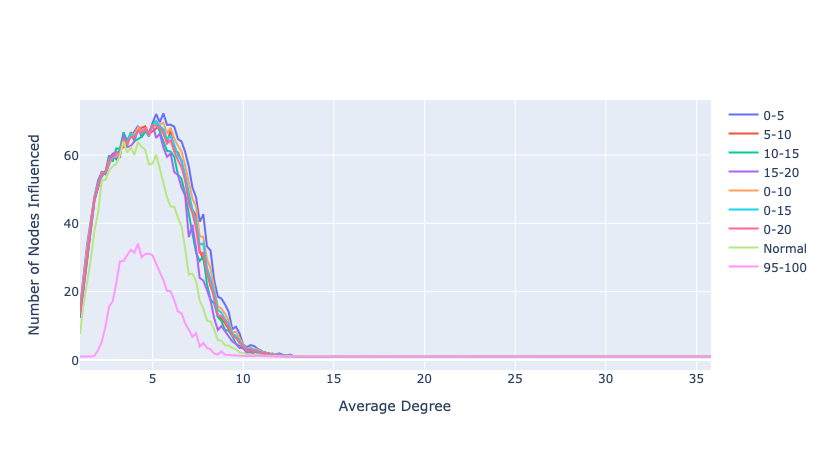

In [12]:
get_graph(RGU, get_cols(RGU, '18'), ylabs_map['S'])

In [7]:
viewer = jupyterlab_dash.AppViewer()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Influentials Dashboard'),
    html.Div([
        html.H2('Poisson Random Graph (Undirected)'),
        dcc.Dropdown(
            id='type_RGU',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_RGU'
        ),
        dcc.Slider(
            id='line_slider_RGU',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Poisson Random Graph (Directed)'),
        dcc.Dropdown(
            id='type_RGD',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_RGD'
        ),
        dcc.Slider(
            id='line_slider_RGD',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Scale Free Network'),
        dcc.Dropdown(
            id='type_SF',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'N'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_SF'
        ),
        dcc.Slider(
            id='line_slider_SF',
            min=0,
            max=len(phis)-1,
            marks={i: '{}%'.format(phis[i]) for i in range(len(phis))},
            value=2,
        )]),
    html.Div([
        html.H2('Influentials in Real Social Networks'),
        dcc.Dropdown(
            id='type_real',
            options=[
                {'label': 'Number of Nodes Influenced', 'value': 'S'},
                {'label': 'Proportion of Network Influenced', 'value': 'P'},
                {'label': 'Average Time of Influenced', 'value': 'T'}
            ],
            value='S'
        ),
        dcc.Graph(
            id='line_graph_real'
        ),
        dcc.RadioItems(
            id='data_name',
            options=[
                {'label': 'Facebook', 'value': 'facebook'},
                {'label': 'Advogato', 'value': 'advogato'}
            ],
            value='facebook',
            labelStyle={'display': 'inline-block', 'margin':'5px'}
        )])
    
])

@app.callback(
    dash.dependencies.Output('line_graph_RGU', 'figure'),
    [dash.dependencies.Input('type_RGU', 'value'), dash.dependencies.Input('line_slider_RGU', 'value')])
def update_graph_RGU(version, phi):
    cols = get_cols(RGU, phis[phi], version=version)
    fig = get_graph(RGU, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_RGD', 'figure'),
    [dash.dependencies.Input('type_RGD', 'value'), dash.dependencies.Input('line_slider_RGD', 'value')])
def update_graph_RGD(version, phi):
    cols = get_cols(RGD, phis[phi], version=version)
    fig = get_graph(RGD, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_SF', 'figure'),
    [dash.dependencies.Input('type_SF', 'value'), dash.dependencies.Input('line_slider_SF', 'value')])
def update_graph_SF(version, phi):
    cols = get_cols(SF, phis[phi], version=version)
    fig = get_graph(SF, cols, ylabs_map[version])
    return fig

@app.callback(
    dash.dependencies.Output('line_graph_real', 'figure'),
    [dash.dependencies.Input('data_name', 'value'), dash.dependencies.Input('type_real', 'value')])
def update_graph_real(name, version):
    fig = get_graph_real(real_data, name=name, version=version)
    return fig


viewer.show(app)